In [10]:
import os
import numpy as np
import xarray as xr
import pandas as pd
import netCDF4 as nc
from scipy import stats

# Create 2D array with file_id, water, and region values for file list
array = np.array([
[6501, 4, 1],[6541, 4, 1],[6640, 6, 1],[6668, 4, 1],[6678, 6, 1],[6687, 6, 1],
[6697, 4, 1],[6714, 6, 1],[6744, 5, 1],[6772, 6, 1],[6783, 6, 1],[6840, 6, 1],
[6844, 4, 1],[6854, 4, 1],[6870, 4, 1],[6891, 4, 0],[6895, 4, 0],[6899, 4, 1],
[6901, 4, 1],[6909, 4, 1],[6929, 4, 1],[6950, 4, 1],[6963, 4, 0],[6969, 4, 0],
[6994, 2, 0],[7032, 2, 1],[7057, 6, 1],[7094, 6, 1],[7095, 6, 1],[7100, 6, 1],
[7108, 6, 0],[7116, 6, 1],[7119, 6, 1],[7131, 4, 1],[7139, 6, 1],[7152, 4, 1],
[7155, 4, 1],[7156, 4, 1],[7182, 4, 1],[7193, 4, 1],[7202, 4, 1],[7239, 2, 0],
[7280, 6, 1],[7286, 6, 1],[7287, 5, 1],[7311, 6, 1],[7321, 6, 1],[7329, 5, 1],
[7347, 4, 1],[7350, 6, 1],[7354, 6, 0],[7357, 6, 1],[7361, 4, 1],[7414, 4, 1],
[7423, 4, 1],[7424, 2, 1],[7432, 4, 0],[7463, 2, 0],[7482, 2, 1],
[7489, 5, 1],[7528, 5, 1],[7531, 6, 1],[7533, 6, 1],[7534, 6, 1],[7538, 5, 1],
[7549, 5, 1],[7553, 5, 0],[7555, 5, 1],[7562, 5, 1],[7571, 5, 1],[7573, 5, 0],
[7574, 6, 1],[7575, 6, 1],[7585, 5, 1],[7599, 4, 1],[7603, 6, 0],[7606, 5, 1],
[7622, 5, 1],[7652, 5, 1],[7671, 3, 1],[7704, 3, 1],[7786, 5, 1],[7805, 5, 1],
[7816, 5, 1],[7838, 5, 1],[7861, 3, 1],[7862, 5, 1],[7863, 5, 1],[7870, 3, 1],
[7892, 3, 1],[7907, 3, 0],[7938, 3, 1],[7962, 1, 1],[7979, 3, 1],
[7987, 1, 1],[7999, 1, 1],[8000, 1, 1],[8034, 5, 1],[8083, 3, 0],[8120, 1, 1],
[8133, 1, 1],[8184, 2, 0],[8186, 2, 0],[8247, 6, 1],[8248, 6, 1],[9858, 4, 1]])

# Set index to get file_id, water, and region values for each file
i=0

# Get the current working directory 
current_directory = os.getcwd() 

# Print the current working directory 
print(current_directory)

# Define the directory containing the files 
path = current_directory+"\\Data\\HADISDH_Humidity\\NC_Files\\"
print(path)

# Create an empty list to hold the dataframes 
dataframes = [] 

# Create datetime object for comparison
datetime_str = '1/1/06 00:00:00'

# Convert string to datetime
datetime_object = datetime.strptime(datetime_str, '%d/%m/%y %H:%M:%S')

# Loop through all filenames in filenames_only.csv 
with open("filenames_only3.csv", mode='r') as file: 
   csv_reader = csv.reader(file)
   for row in csv_reader:
      filename = row[0]
      print(filename)
      array_row = array[i]
      # Open the NetCDF file
      file = path+filename
      ds = xr.open_dataset(file)
      # Convert the dataset to a DataFrame
      df = ds.to_dataframe().reset_index()
      df_filtered = df[df['time'] >= datetime_object] # Remove data older than January 1, 2006
      df_filtered.set_index('time', inplace = True)
      # Drop unneeded columns
      df_filtered = df_filtered.drop(['input_station_id','station_id','coordinate_length'], axis=1)
      df_filtered = df_filtered.drop(['relative_humidity', 'saturation_vapor_pressure', 'dewpoints'], axis=1)
      df_filtered = df_filtered.assign(file_id = int(array_row[0]))
      df_filtered = df_filtered.assign(region = int(array_row[1]))
      df_filtered = df_filtered.assign(water = int(array_row[2]))
      df_filtered = df_filtered.assign(region_water = 10*int(array_row[1])+int(array_row[2]))
      i += 1
      dataframes.append(df_filtered)

# Concatenate all Dataframes
combined_df = pd.concat(dataframes, ignore_index=False)

# Now combined_df contains all the data from NC files
print(combined_df)

C:\Users\User
C:\Users\User\Data\HADISDH_Humidity\NC_Files\
hadisd.3.4.1.202411p_19310101-20241201_720175-53919_humidity.nc
hadisd.3.4.1.202411p_19310101-20241201_720306-53879_humidity.nc
hadisd.3.4.1.202411p_19310101-20241201_722014-12818_humidity.nc
hadisd.3.4.1.202411p_19310101-20241201_722054-53959_humidity.nc
hadisd.3.4.1.202411p_19310101-20241201_722069-53853_humidity.nc
hadisd.3.4.1.202411p_19310101-20241201_722080-13880_humidity.nc
hadisd.3.4.1.202411p_19310101-20241201_722095-03030_humidity.nc
hadisd.3.4.1.202411p_19310101-20241201_722116-12873_humidity.nc
hadisd.3.4.1.202411p_19310101-20241201_722151-14794_humidity.nc
hadisd.3.4.1.202411p_19310101-20241201_722185-53838_humidity.nc
hadisd.3.4.1.202411p_19310101-20241201_722197-53819_humidity.nc
hadisd.3.4.1.202411p_19310101-20241201_722300-53864_humidity.nc
hadisd.3.4.1.202411p_19310101-20241201_722314-53915_humidity.nc
hadisd.3.4.1.202411p_19310101-20241201_722330-53865_humidity.nc
hadisd.3.4.1.202411p_19310101-20241201_72235

In [11]:
# Count NaN values in each column grouped by region and water columns
nan_counts_temp = combined_df.groupby('region_water')['temperatures'].apply(lambda x: x.isna().sum())
nan_counts_sh = combined_df.groupby('region_water')['specific_humidity'].apply(lambda x: x.isna().sum())
nan_counts_slp = combined_df.groupby('region_water')['slp'].apply(lambda x: x.isna().sum())
nan_counts_vp = combined_df.groupby('region_water')['vapor_pressure'].apply(lambda x: x.isna().sum())
nan_counts_tw = combined_df.groupby('region_water')['wet_bulb_temperature'].apply(lambda x: x.isna().sum())
not_nan_counts_temp = combined_df.groupby('region_water')['temperatures'].apply(lambda x: x.notna().sum())
not_nan_counts_sh = combined_df.groupby('region_water')['specific_humidity'].apply(lambda x: x.notna().sum())
not_nan_counts_slp = combined_df.groupby('region_water')['slp'].apply(lambda x: x.notna().sum())
not_nan_counts_vp = combined_df.groupby('region_water')['vapor_pressure'].apply(lambda x: x.notna().sum())
not_nan_counts_tw = combined_df.groupby('region_water')['wet_bulb_temperature'].apply(lambda x: x.notna().sum())
print(nan_counts_temp)
print(nan_counts_sh)
print(nan_counts_slp)
print(nan_counts_vp)
print(nan_counts_tw)
print(not_nan_counts_temp)
print(not_nan_counts_sh)
print(not_nan_counts_slp)
print(not_nan_counts_vp)
print(not_nan_counts_tw)

region_water
11     3974
20     2285
21     1159
30     1097
31     3339
40     3581
41    20653
50     2426
51    18785
60     1248
61    14936
Name: temperatures, dtype: int64
region_water
11     48960
20     29747
21     23043
30     16010
31     63570
40     40790
41    206567
50     11122
51    214742
60     25735
61    218304
Name: specific_humidity, dtype: int64
region_water
11     46660
20     26166
21     22164
30     15013
31     61384
40     36996
41    190267
50     10982
51    209570
60     24854
61    193973
Name: slp, dtype: int64
region_water
11     48960
20     29747
21     23043
30     16010
31     63570
40     40790
41    206567
50     11122
51    214742
60     25735
61    218304
Name: vapor_pressure, dtype: int64
region_water
11     48960
20     29747
21     23043
30     16010
31     63570
40     40790
41    206567
50     11122
51    214742
60     25735
61    218304
Name: wet_bulb_temperature, dtype: int64
region_water
11     989855
20     826006
21     495742
30   

In [13]:
combined_df.reset_index(inplace=True)

combined_df['year'] = combined_df['time'].apply(lambda x: x.year)
combined_df['month'] = combined_df['time'].apply(lambda x: x.month)

print(combined_df)

                        time  longitude  latitude  elevation  temperatures  \
0        2006-01-01 00:00:00    -91.756    33.636       85.0     14.000000   
1        2006-01-01 01:00:00    -91.756    33.636       85.0     13.300003   
2        2006-01-01 02:00:00    -91.756    33.636       85.0     11.699997   
3        2006-01-01 03:00:00    -91.756    33.636       85.0      9.400002   
4        2006-01-01 04:00:00    -91.756    33.636       85.0     10.599998   
...                      ...        ...       ...        ...           ...   
17553064 2024-11-30 19:00:00    -97.091    36.118      271.3     12.800003   
17553065 2024-11-30 20:00:00    -97.091    36.118      271.3     12.199997   
17553066 2024-11-30 21:00:00    -97.091    36.118      271.3     12.199997   
17553067 2024-11-30 22:00:00    -97.091    36.118      271.3     10.900002   
17553068 2024-11-30 23:00:00    -97.091    36.118      271.3      9.099998   

                  slp  vapor_pressure  wet_bulb_temperature  \


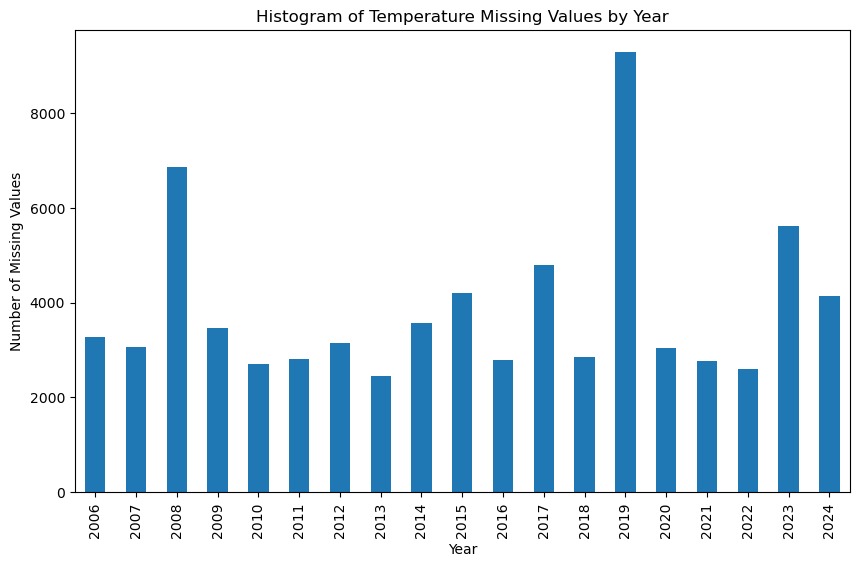

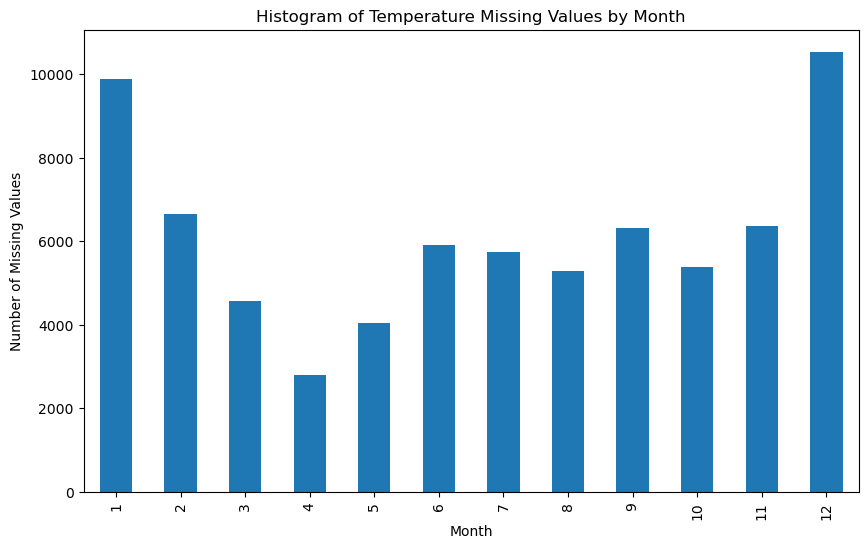

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

missing_values_by_year_temp = combined_df.groupby('year')['temperatures'].apply(lambda x: x.isna().sum())
missing_values_by_month_temp = combined_df.groupby('month')['temperatures'].apply(lambda x: x.isna().sum())

#missing_values_by_year_temp = missing_values_by_year_temp / 106.0
#missing_values_by_month_temp = missing_values_by_month_temp / 106.0

missing_values_by_year_temp.plot(kind='bar', figsize=(10, 6))
plt.title('Histogram of Temperature Missing Values by Year')
plt.xlabel('Year')
plt.ylabel('Number of Missing Values')
plt.show()

missing_values_by_month_temp.plot(kind='bar', figsize=(10, 6))
plt.title('Histogram of Temperature Missing Values by Month')
plt.xlabel('Month')
plt.ylabel('Number of Missing Values')
plt.show()


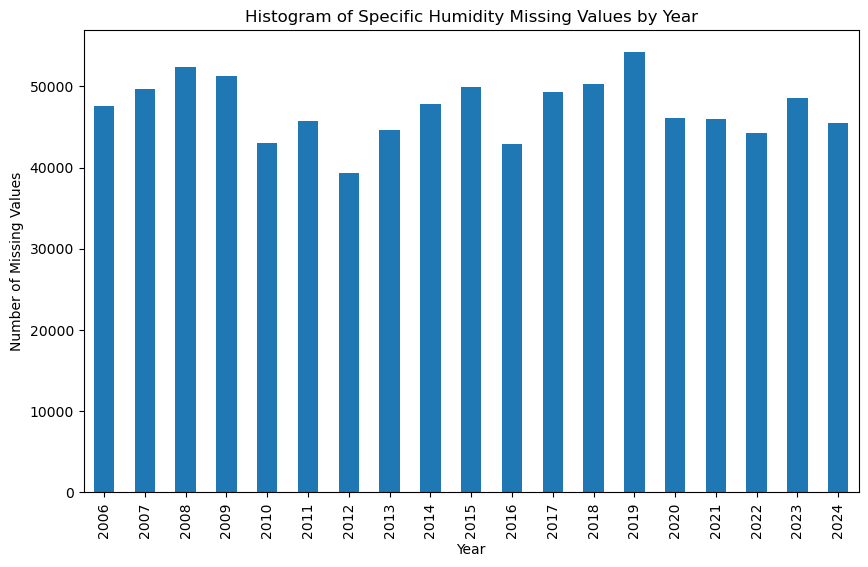

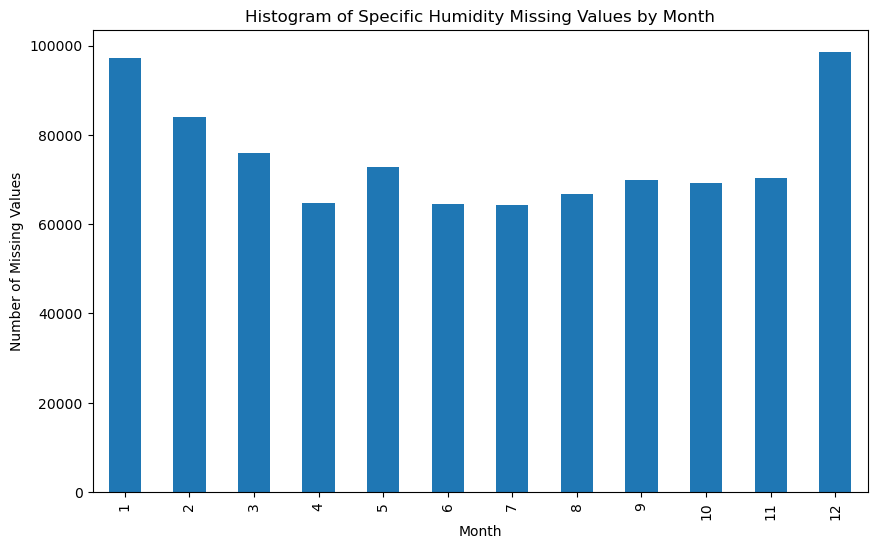

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

missing_values_by_year_sh = combined_df.groupby('year')['specific_humidity'].apply(lambda x: x.isna().sum())
missing_values_by_month_sh = combined_df.groupby('month')['specific_humidity'].apply(lambda x: x.isna().sum())

missing_values_by_year_sh.plot(kind='bar', figsize=(10, 6))
plt.title('Histogram of Specific Humidity Missing Values by Year')
plt.xlabel('Year')
plt.ylabel('Number of Missing Values')
plt.show()

missing_values_by_month_sh.plot(kind='bar', figsize=(10, 6))
plt.title('Histogram of Specific Humidity Missing Values by Month')
plt.xlabel('Month')
plt.ylabel('Number of Missing Values')
plt.show()

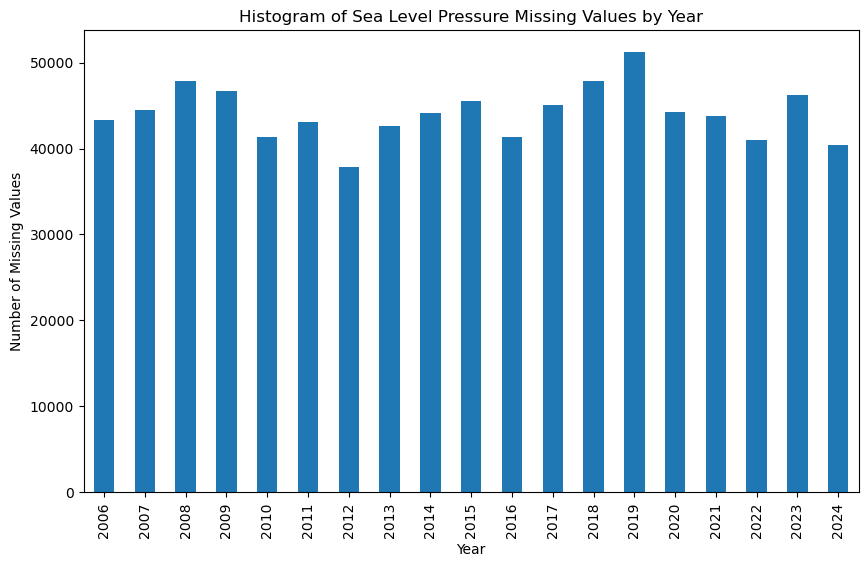

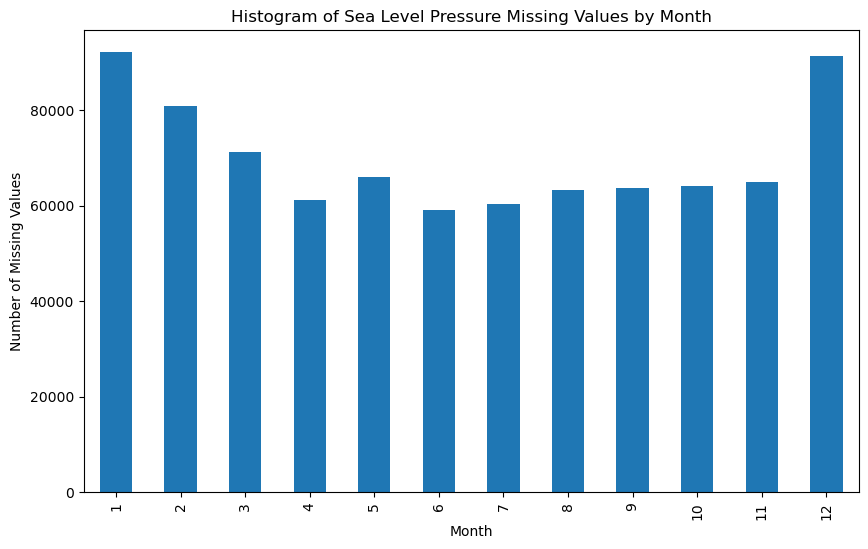

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

missing_values_by_year_slp = combined_df.groupby('year')['slp'].apply(lambda x: x.isna().sum())
missing_values_by_month_slp = combined_df.groupby('month')['slp'].apply(lambda x: x.isna().sum())

missing_values_by_year_slp.plot(kind='bar', figsize=(10, 6))
plt.title('Histogram of Sea Level Pressure Missing Values by Year')
plt.xlabel('Year')
plt.ylabel('Number of Missing Values')
plt.show()

missing_values_by_month_slp.plot(kind='bar', figsize=(10, 6))
plt.title('Histogram of Sea Level Pressure Missing Values by Month')
plt.xlabel('Month')
plt.ylabel('Number of Missing Values')
plt.show()

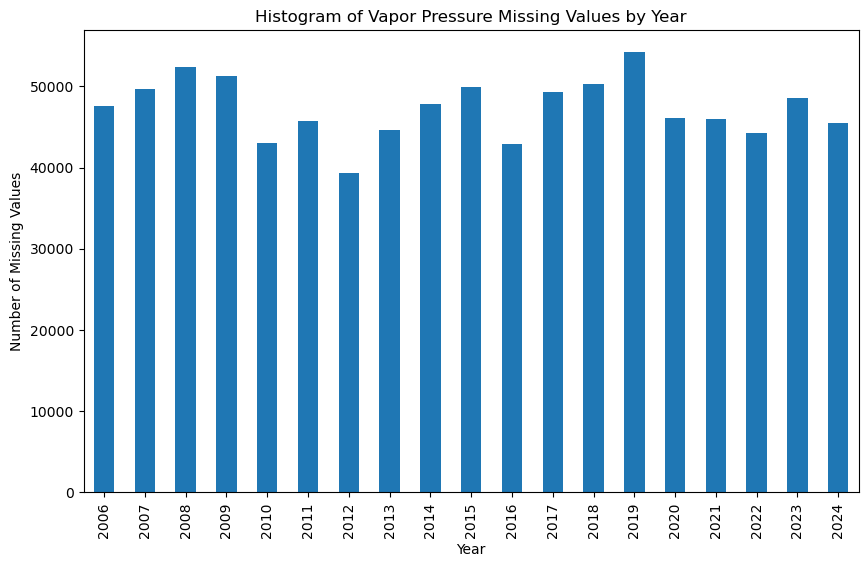

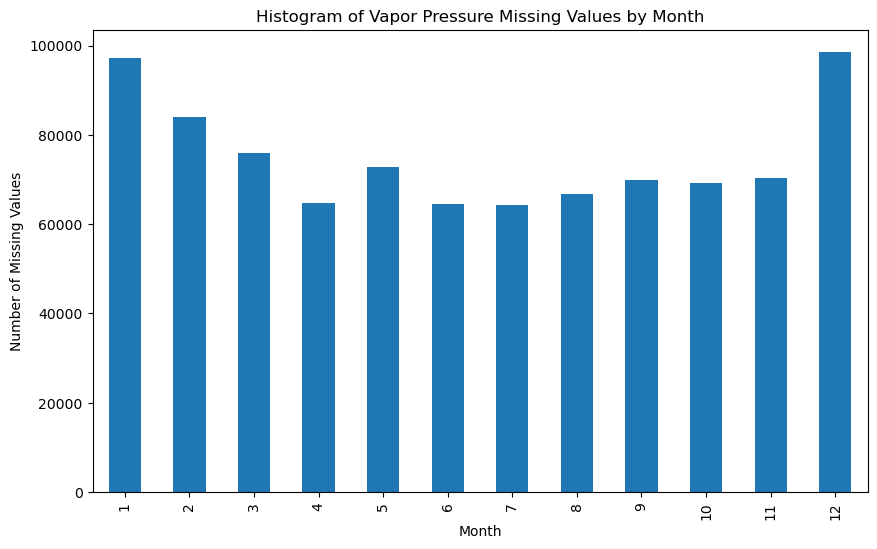

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

missing_values_by_year_vp = combined_df.groupby('year')['vapor_pressure'].apply(lambda x: x.isna().sum())
missing_values_by_month_vp = combined_df.groupby('month')['vapor_pressure'].apply(lambda x: x.isna().sum())

missing_values_by_year_vp.plot(kind='bar', figsize=(10, 6))
plt.title('Histogram of Vapor Pressure Missing Values by Year')
plt.xlabel('Year')
plt.ylabel('Number of Missing Values')
plt.show()

missing_values_by_month_vp.plot(kind='bar', figsize=(10, 6))
plt.title('Histogram of Vapor Pressure Missing Values by Month')
plt.xlabel('Month')
plt.ylabel('Number of Missing Values')
plt.show()

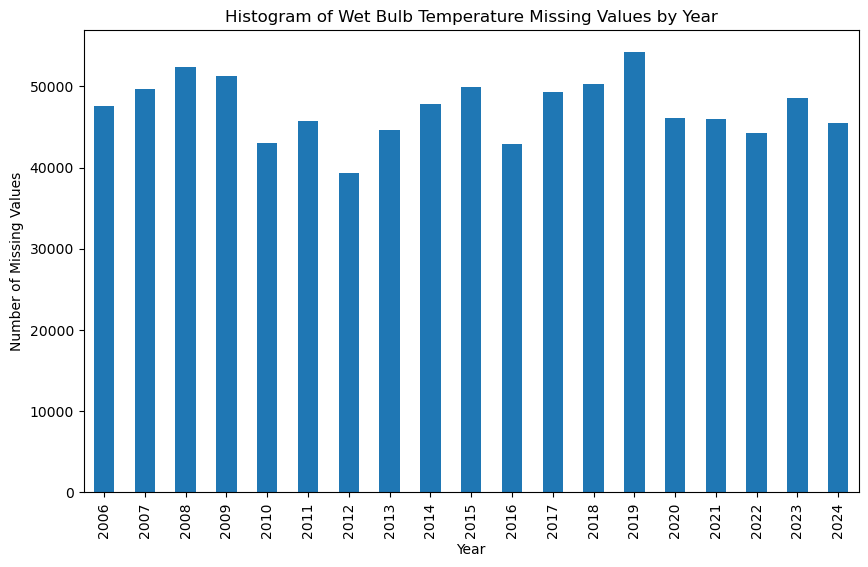

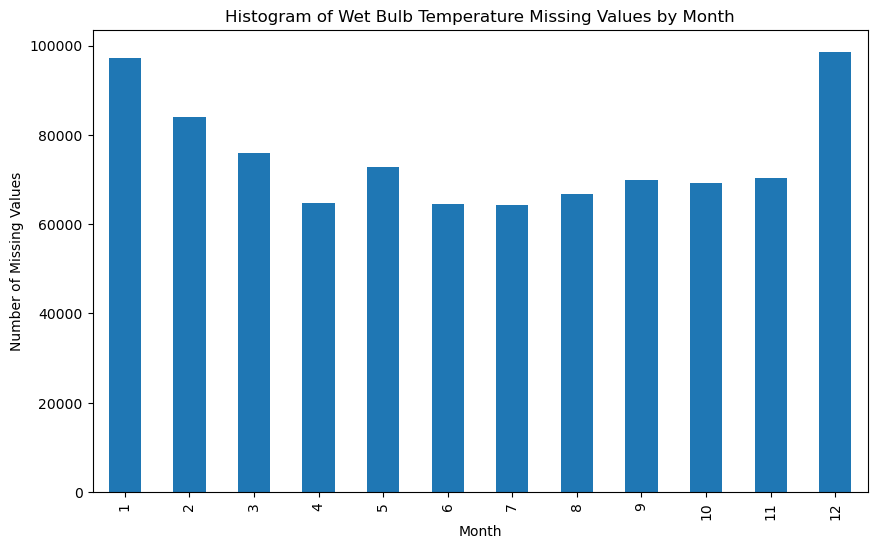

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

missing_values_by_year_wbt = combined_df.groupby('year')['wet_bulb_temperature'].apply(lambda x: x.isna().sum())
missing_values_by_month_wbt = combined_df.groupby('month')['wet_bulb_temperature'].apply(lambda x: x.isna().sum())

missing_values_by_year_wbt.plot(kind='bar', figsize=(10, 6))
plt.title('Histogram of Wet Bulb Temperature Missing Values by Year')
plt.xlabel('Year')
plt.ylabel('Number of Missing Values')
plt.show()

missing_values_by_month_wbt.plot(kind='bar', figsize=(10, 6))
plt.title('Histogram of Wet Bulb Temperature Missing Values by Month')
plt.xlabel('Month')
plt.ylabel('Number of Missing Values')
plt.show()

In [25]:
pearson_df = combined_df.drop(['latitude', 'longitude', 'elevation', 'region_water', 'time', 'file_id'], axis=1)

correlation_matrix = pearson_df.corr(method='pearson')
print(correlation_matrix)

                      temperatures       slp  vapor_pressure  \
temperatures              1.000000 -0.361862        0.788143   
slp                      -0.361862  1.000000       -0.278399   
vapor_pressure            0.788143 -0.278399        1.000000   
wet_bulb_temperature      0.960994 -0.360119        0.907470   
specific_humidity         0.793498 -0.295944        0.997959   
region                    0.066507  0.087432        0.203528   
water                    -0.049340  0.060975        0.060640   
year                      0.034438  0.006219        0.044924   
month                     0.184481  0.009819        0.182955   

                      wet_bulb_temperature  specific_humidity    region  \
temperatures                      0.960994           0.793498  0.066507   
slp                              -0.360119          -0.295944  0.087432   
vapor_pressure                    0.907470           0.997959  0.203528   
wet_bulb_temperature              1.000000           0.9102

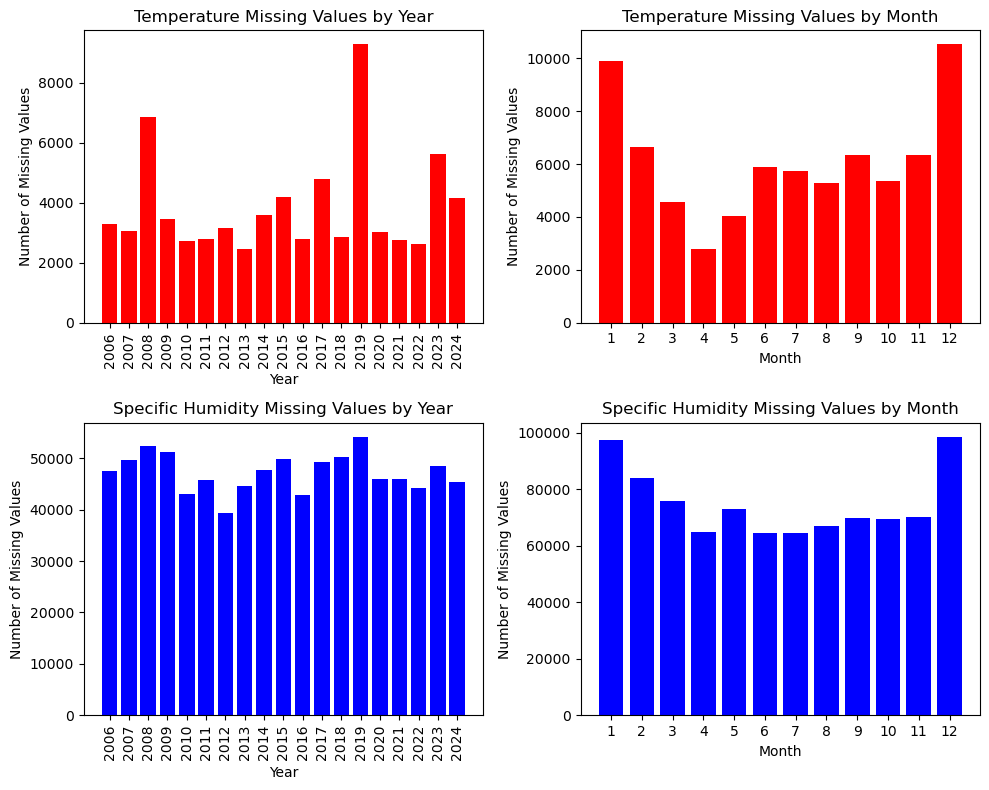

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

missing_values_by_year_temp = combined_df.groupby('year')['temperatures'].apply(lambda x: x.isna().sum())
missing_values_by_month_temp = combined_df.groupby('month')['temperatures'].apply(lambda x: x.isna().sum())
missing_values_by_year_sh = combined_df.groupby('year')['specific_humidity'].apply(lambda x: x.isna().sum())
missing_values_by_month_sh = combined_df.groupby('month')['specific_humidity'].apply(lambda x: x.isna().sum())

df1 = missing_values_by_year_temp.to_frame()
df1.reset_index(inplace=True)
df1.columns = ['Year', 'Number']
x1 = df1['Year'].astype(int)
y1 = df1['Number'].astype(int)

df2 = missing_values_by_month_temp.to_frame()
df2.reset_index(inplace=True)
df2.columns = ['Month', 'Number']
x2 = df2['Month'].astype(int)
y2 = df2['Number'].astype(int)

df3 = missing_values_by_year_sh.to_frame()
df3.reset_index(inplace=True)
df3.columns = ['Year', 'Number']
x3 = df3['Year'].astype(int)
y3 = df3['Number'].astype(int)

df4 = missing_values_by_month_sh.to_frame()
df4.reset_index(inplace=True)
df4.columns = ['Month', 'Number']
x4 = df4['Month'].astype(int)
y4 = df4['Number'].astype(int)

# Create a figure and a grid of subplots (2x2)
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot histograms in each subplot
axs[0, 0].bar(x1, y1, color='red')
axs[0, 0].set_title('Temperature Missing Values by Year')
axs[0, 0].set_xlabel('Year')
axs[0, 0].set_ylabel('Number of Missing Values')
axs[0, 0].set_xticks(np.arange(2006, 2025, 1))
axs[0, 0].tick_params(axis='x', rotation=90)

axs[0, 1].bar(x2, y2, color='red')
axs[0, 1].set_title('Temperature Missing Values by Month')
axs[0, 1].set_xlabel('Month')
axs[0, 1].set_ylabel('Number of Missing Values')
axs[0, 1].set_xticks(np.arange(1, 13, 1))

axs[1, 0].bar(x3, y3, color='blue')
axs[1, 0].set_title('Specific Humidity Missing Values by Year')
axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('Number of Missing Values')
axs[1, 0].set_xticks(np.arange(2006, 2025, 1))
axs[1, 0].tick_params(axis='x', rotation=90)

axs[1, 1].bar(x4, y4, color='blue')
axs[1, 1].set_title('Specific Humidity Missing Values by Month')
axs[1, 1].set_xlabel('Month')
axs[1, 1].set_ylabel('Number of Missing Values')
axs[1, 1].set_xticks(np.arange(1, 13, 1))

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [2]:
import os
import pandas as pd

# Get the current working directory 
current_directory = os.getcwd() 

# Print the current working directory 
print(current_directory)

# Define the directory containing the files 
path = current_directory+"\\"
print(path)

df = pd.read_csv('Final_Monthly_Dataset.csv')

pearson_df = df.drop(['latitude', 'longitude', 'elevation', 'date', 'file_id', 'Day', 'vapor_pressure'], axis=1)
pearson_df = pearson_df.drop(df.columns[0], axis=1)
print(pearson_df)

correlation_matrix = pearson_df.corr(method='pearson')
print(correlation_matrix)

# Get descriptive statistics
descriptive_stats = pearson_df.describe()

print(descriptive_stats)

C:\Users\User
C:\Users\User\
       temperatures          slp  wet_bulb_temperature  specific_humidity  \
0         12.209677  1018.534543              7.759507           5.386935   
1          8.174541  1021.230347              4.326557           4.299929   
2         15.676613  1018.968548             10.491486           6.505135   
3         22.464167  1014.686944             16.981874          10.211263   
4         23.657258  1014.236828             18.675700          11.737971   
...             ...          ...                   ...                ...   
24057     28.604704  1013.969355             22.781443          15.211417   
24058     29.114919  1015.112097             22.875429          15.149811   
24059     24.570278  1014.393750             18.061455          10.720199   
24060     21.159140  1018.230376             13.388460           6.989922   
24061     12.112917  1015.400069              8.511346           6.313758   

       water         GHI      WDSP      PRCP  